libraries

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import PolynomialFeatures

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import VotingClassifier
from vecstack import stacking
from scipy.stats.mstats import gmean

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
from sklearn.externals import joblib
import pickle
from itertools import combinations
import gc
from tqdm import tqdm
import platform

# Keras
import tensorflow as tf
# Tensorflow warning off
if tf.__version__[0] < '2':
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    tf.logging.set_verbosity(tf.logging.ERROR)
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.constraints import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot
from keras.preprocessing.image import *
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import *

from keras.models import Model, Sequential
from keras import Input
from keras import layers
from keras.optimizers import RMSprop
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


read data & set seed

In [2]:
# read data
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender
IDtest = df_test['cust_id'].unique()

# set seed
seed = 2020
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

transform data

In [3]:
# 띄어쓰기, 점, 콤마, 세로바 없애기

before = [
# 띄어쓰기
'기초 화장품', '니  트', '캐릭터 여화', '캐릭터 남화', '수      저', '4대 B/D', 'N/B 아동복', '수입 아동복', '스낵형 델리','수입청소기 외','영 캐릭터','영 트렌디','식기 단독매입','커       튼','생활잡화 단독매입',
'가구 단독매입','커리어 행사','가 방','패션 단독매입','시티 단독매입','신생아완구 단독매입','MP3 外','인텔리젼스 행사',
'구두 단독매입','시네마 매점','시티웨어 행사','장신 단독매입','NB 남화','남성시티 직매입','영플라자 (올리브핫스텁)',
'색조 화장품','NB 여화','직수입 골프의류','트래디 행사','IT 게임기,S/W','TAKE OUT','주방 단독매입','셔츠 직매입(PB)', '남성정장 직매입',
# 점
'N.B정장', '즉석.스넥(매장)','N.B', 'L.B',
# 콤마
'기타(가발,포장,담배,끽연구,사진,수선)', '원목,학생,철재',  
# 세로바
'N/B골프의류', 'L/C 아동복', 'L/C골프의류', '4대B/D', '우/양산(특정)', 'N/B아동복', 'L/C정장', '국산A/V','수입A/V','영플라자(진/유니)',
'IT게임기,S/W', '피아노/악기',
] 

after = ['기초화장품', '니트', '캐릭터여화', '캐릭터남화', '수저', '4대B/D', 'N/B아동복', '수입아동복', '스낵형델리','수입청소기외','영캐릭터','영트렌디','식기단독매입','커튼','생활잡화단독매입','가구단독매입',
'커리어행사','가방','패션단독매입','시티단독매입','신생아완구단독매입','MP3外','인텔리젼스행사','구두단독매입','시네마매점','시티웨어행사','장신단독매입','NB남화','남성시티직매입','영플라자(올리브핫스텁)',
'색조화장품','NB여화','직수입골프의류','트래디행사','IT게임기,S/W','TAKEOUT','주방단독매입','셔츠직매입(PB)', '남성정장직매입',
'NB정장', '즉석스넥(매장)','NB', 'LB', '기타(가발포장담배끽연구사진수선)', '원목학생철재',
'NB골프의류', 'LC아동복', 'LC골프의류', '4대BD', '우양산(특정)', 'NB아동복', 'LC정장', '국산AV','수입AV','영플라자(진유니)',
'IT게임기SW', '피아노악기',]



df_train.gds_grp_nm = df_train.gds_grp_nm.replace(before, after)
df_test.gds_grp_nm = df_test.gds_grp_nm.replace(before, after)

In [11]:
max_features_nm = 340 # 중분류 nunique = 330
maxlen_nm = 450 # oversample n=3 일때 np.mean: 397
                # 100 결과: 720, 450 결과: 724, 600결과: 718, 500결과: 716
emb_dim_nm = 128 # 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기

# Converts a "gds_grp_nm" to a sequence of indexes in a fixed-size hashing space
X_train_nm = df_train.groupby('cust_id')['gds_grp_nm'].apply(lambda x: [one_hot(products, max_features_nm)[0] for products in x]).values
X_test_nm = df_test.groupby('cust_id')['gds_grp_nm'].apply(lambda x: [one_hot(products, max_features_nm)[0] for products in x]).values


# oversample2: 
    # 1. unique X(get all products with duplication)
    # 2. replace=True(Restoration extraction)
    # 3. more buy, more oversample
    #       -> if you want to oversample in same ratio, just adjust n=1 to oversample=1, and erase 'for oversample in range(n)'

def oversample2(data, n=1, seed=seed):
    
    np.random.seed(seed)
    
    customerProducts = []
    
    for products in data:
        
        for oversample in range(n):
            
            products = list(np.append(products, np.random.choice(products, len(products) * oversample, replace=True)))
            
        customerProducts.append(products)
        
    return customerProducts

In [12]:
X_train_nm = oversample2(X_train_nm, 3)
X_test_nm = oversample2(X_test_nm, 3)
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender

In [13]:
# 차이를 한번 봐야함: pad_sequences에서 truncating 하는 것이 좋은지, 안하는 것이 성능이 더 좋은지
# 1. 일단 적은 양으로 가보기 위해 truncating 실시.
# 2. 중분류 외 다른 피쳐 해보기, 또는 중분류에 추가해보기

X_train_nm = pad_sequences(X_train_nm, maxlen=maxlen_nm, padding='post', truncating='post', value=0)
X_test_nm = pad_sequences(X_test_nm, maxlen=maxlen_nm, padding='post', truncating='post', value=0)

X_train_nm.shape, X_test_nm.shape

((3500, 450), (2482, 450))

##### Split data into train & validation set 

In [14]:
# Train/Validation
i = int(round(X_train_nm.shape[0] * 0.8,0))
X_valid, y_valid = X_train_nm[i:], y_train[i:]
X_train, y_train = X_train_nm[:i], y_train[:i]

build models

In [15]:
model = Sequential(name = 'cnn_model')
model.add(layers.Embedding(max_features_nm, emb_dim_nm))
model.add(layers.Conv1D(32, 3, activation='elu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 3, activation='elu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))
# choose the Optimizere and the Cost function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         43520     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          12320     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          3104      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33

Train the Model

Train on 2800 samples, validate on 700 samples
Epoch 1/100
2800/2800 [==============================] - 2s 767us/step - loss: 0.6404 - acc: 0.6393 - val_loss: 0.6104 - val_acc: 0.6486
Epoch 2/100
2800/2800 [==============================] - 2s 778us/step - loss: 0.5870 - acc: 0.6921 - val_loss: 0.5866 - val_acc: 0.6871
Epoch 3/100
2800/2800 [==============================] - 2s 885us/step - loss: 0.5640 - acc: 0.7139 - val_loss: 0.5902 - val_acc: 0.6800
Epoch 4/100
2800/2800 [==============================] - 2s 889us/step - loss: 0.5540 - acc: 0.7229 - val_loss: 0.5845 - val_acc: 0.6914
Epoch 5/100
2800/2800 [==============================] - 3s 933us/step - loss: 0.5429 - acc: 0.7332 - val_loss: 0.5926 - val_acc: 0.6800
Epoch 6/100
2800/2800 [==============================] - 3s 969us/step - loss: 0.5387 - acc: 0.7393 - val_loss: 0.5946 - val_acc: 0.6943
Epoch 7/100
2800/2800 [==============================] - 3s 915us/step - loss: 0.5263 - acc: 0.7493 - val_loss: 0.5918 - val_acc: 0

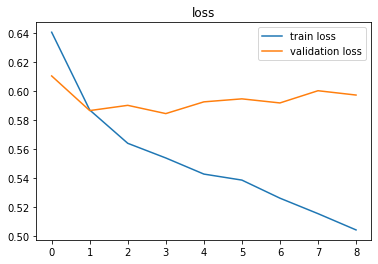

In [16]:
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
                 epochs=100, batch_size=64, #validation_split=0.2,
                 callbacks=[EarlyStopping(patience=5)])

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title('loss')
plt.show()

evalutate the model performance

In [18]:
print(model.evaluate(X_valid, y_valid))
# ROC-AUC
print()
print(roc_auc_score(y_valid, model.predict(X_valid)))

700/700 [==============================] - 0s 207us/step
[0.5972378788675581, 0.6828571557998657]

0.7297704684459272


make submissions

In [156]:
pred = model.predict(X_test_nm)[:,0]

In [157]:
pred[:50]

array([0.53096324, 0.07837042, 0.26985273, 0.42824668, 0.1724956 ,
       0.4152102 , 0.0687066 , 0.83847576, 0.4857877 , 0.13549984,
       0.09458235, 0.15756002, 0.72020066, 0.08413813, 0.34514606,
       0.13465306, 0.04688558, 0.07157484, 0.24924836, 0.88880587,
       0.77399206, 0.6496856 , 0.7040808 , 0.22553408, 0.19519165,
       0.6074631 , 0.22560093, 0.8040745 , 0.44003698, 0.18268272,
       0.2190204 , 0.5444505 , 0.03688443, 0.24505773, 0.54306614,
       0.05554578, 0.05418253, 0.70698124, 0.5563174 , 0.5513121 ,
       0.30834824, 0.13680121, 0.11692536, 0.7770626 , 0.12462425,
       0.36617547, 0.26136017, 0.06161264, 0.60382843, 0.17389932],
      dtype=float32)

In [27]:
fname = 'conv1d_submissions.csv'
submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
submissions.to_csv(fname, index=False)
print(f"'{fname}' is ready to submit.")

'conv1d_submissions.csv' is ready to submit.


```python
def rcnn(input_shape, n_classes):
    """
    Input size should be [batch, 1d, ch] = (XXX, 3000, 1)
    """
    model = Sequential(name='RCNN test')
    model.add(Conv1D (kernel_size = (200), filters = 20, batch_input_shape=input_shape, activation='elu'))
    model.add(MaxPooling1D(pool_size = (20), strides=(10)))
    model.add(Conv1D (kernel_size = (20), filters = 200, activation='elu'))
    model.add(MaxPooling1D(pool_size = (10), strides=(3)))
    model.add(Conv1D (kernel_size = (20), filters = 200, activation='elu'))
    model.add(MaxPooling1D(pool_size = (10), strides=(3)))
    model.add(Dense (512, activation='elu'))
    model.add(Dense (512, activation='elu'))
    model.add(Reshape((1,model.output_shape[1])))
    model.add(LSTM(256, stateful=True, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation = 'sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer=Adadelta())
    return model 
```

```python
def build_lstm(input_shape):
    model = Sequential()
    # model.add(Masking(input_shape=input_shape, mask_value=-1.))
    model.add(Embedding(input_shape[0], 128, input_length=input_shape[1]))

    model.add(Convolution1D(nb_filter=64,
                            filter_length=5,
                            border_mode='valid',
                            activation='relu',
                            subsample_length=1))
    model.add(MaxPooling1D(pool_length=4))

    model.add(GRU(128))

    # model.add(GRU(128, return_sequences=False))
    # Add dropout if overfitting
    # model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 
```

```python
def custom_1D_CNN():
    # Configuration for Neural network
    VOCABULARY_SIZE = 5000
    MAX_SEQUENCE_LENGTH = 300
    OUTPUT_EMBEDDING_DIM = 100
    # Build the model
    custom_1D_CNN_model = Sequential()
    custom_1D_CNN_model.add(Embedding(VOCABULARY_SIZE, OUTPUT_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    custom_1D_CNN_model.add(Conv1D(filters=100, kernel_size=5, strides=1, padding='same', activation='relu'))
    custom_1D_CNN_model.add(MaxPooling1D(pool_size=2, strides= None))
    custom_1D_CNN_model.add(Dropout(0.2))
    custom_1D_CNN_model.add(Conv1D(filters=100,kernel_size=5))
    custom_1D_CNN_model.add(MaxPooling1D(pool_size=2, strides=1))
    custom_1D_CNN_model.add(Dropout(0.3))
    custom_1D_CNN_model.add(Flatten())
    custom_1D_CNN_model.add(Dense(100, activation='relu'))

    #custom_1D_CNN_model.add(Conv1D(50, 5, strides=1))
    #custom_1D_CNN_model.add(MaxPooling1D(pool_size=3, strides=None))
    custom_1D_CNN_model.add(Dense(20,activation='sigmoid'))
    custom_1D_CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Return the model
    return custom_1D_CNN_model 
```

```python

def custom_C_LSTM_model():
    # Configuration for Neural network
    VOCABULARY_SIZE = 5000
    MAX_SEQUENCE_LENGTH = 1000
    OUTPUT_EMBEDDING_DIM = 32
    
    # Create a sequential model
    custom_cLSTM_model = Sequential()
    custom_cLSTM_model.add(Embedding(VOCABULARY_SIZE, OUTPUT_EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
    custom_cLSTM_model.add(Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
    custom_cLSTM_model.add(MaxPooling1D(pool_size=2))
    custom_cLSTM_model.add(LSTM(100))
    custom_cLSTM_model.add(Dense(20, activation='sigmoid'))
    custom_cLSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    #Return the compiled neural network model
    return custom_cLSTM_model 
```

```python
def __init__(self, embedding_matrix, max_seq_len, n_classes, num_filters = 64, weight_decay = 1e-4):

        nb_words = embedding_matrix.shape[0]
        embed_dim = embedding_matrix.shape[1]

        self.model = Sequential()
        self.model.add(Embedding(nb_words, embed_dim,
            weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
        self.model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
        self.model.add(MaxPooling1D(2))
        self.model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
        self.model.add(GlobalMaxPooling1D())
        self.model.add(Dropout(0.5))
        self.model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
        self.model.add(Dense(n_classes, activation='sigmoid'))  #multi-label (k-hot encoding)

        adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        self.model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
        self.model.summary() 
        ```

In [ ]:
def get_deep_conv_nn(input_shape,output_dimension):
    model = Sequential()
    model.add(Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=input_shape,padding='same'))
    model.add(Conv1D(filters=32,kernel_size=3,activation='relu',padding='same'))
    model.add(MaxPooling1D(padding='same'))
    model.add(Conv1D(filters=16,kernel_size=3,activation='relu',padding='same'))
    model.add(Conv1D(filters=16,kernel_size=3,activation='relu',padding='same'))
    model.add(MaxPooling1D(padding='same'))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(output_dimension,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model 

In [ ]:
def get_deep_cnn(input_dim,output_dim,vocab_dimension):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_dimension, output_dim=125, input_length=input_dim))
    model.add(Conv1D(32,3,activation='relu',padding='same'))
    model.add(Dropout(0.3))
    model.add(Conv1D(16,3,activation='relu',padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32,3,activation='relu',padding='same'))
    model.add(Dropout(0.3))
    model.add(Conv1D(16, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(output_dim,activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model 

In [ ]:
def build_model(words, vec_len, review_len):
    model = Sequential()
    model.add(Embedding(words, vec_len, input_length=review_len))
    model.add(Dropout(0.25))
    model.add(Conv1D(32, 3, padding="same"))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(16, 3, padding="same"))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(100, activation="sigmoid"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()
    return model 

In [ ]:
def cnn3adam(input_shape, n_classes):
    """
    Input size should be [batch, 1d, 2d, ch] = (None, 3000, 3)
    """
    model = Sequential(name='cnn3adam')
    model.add(Conv1D (kernel_size = (50), filters = 64, strides=5, input_shape=input_shape, kernel_initializer='he_normal', activation='elu')) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Conv1D (kernel_size = (5), filters = 128, strides=1, kernel_initializer='he_normal', activation='elu')) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling1D())
    
    model.add(Conv1D (kernel_size = (5), filters = 128, strides=2, kernel_initializer='he_normal', activation='elu')) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling1D())
    
    model.add(Flatten())
    model.add(Dense (500, activation='elu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense (500, activation='elu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam())
    return model 

In [14]:
from keras.layers import BatchNormalization, Dropout
def deep_cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
model = deep_cnn_advanced()
model.summary()

NameError: name 'X_train' is not defined

In [ ]:
def deep_cnn_advanced_nin():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    # 1x1 convolution
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = deep_cnn_advanced_nin()
model.summary()

In [ ]:
Benefit
논문에서 주장하는 Batch Normalization의 장점은 다음과 같다.

기존 Deep Network에서는 learning rate를 너무 높게 잡을 경우 gradient가 explode/vanish 하거나, 나쁜 local minima에 빠지는 문제가 있었다. 이는 parameter들의 scale 때문인데, Batch Normalization을 사용할 경우 propagation 할 때 parameter의 scale에 영향을 받지 않게 된다. 따라서, learning rate를 크게 잡을 수 있게 되고 이는 빠른 학습을 가능케 한다.
Batch Normalization의 경우 자체적인 regularization 효과가 있다. 이는 기존에 사용하던 weight regularization term 등을 제외할 수 있게 하며, 나아가 Dropout을 제외할 수 있게 한다 (Dropout의 효과와 Batch Normalization의 효과가 같기 때문.) . Dropout의 경우 효과는 좋지만 학습 속도가 다소 느려진다는 단점이 있는데, 이를 제거함으로서 학습 속도도 향상된다.

In [ ]:
# visualization
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, GlobalMaxPooling1D, MaxPooling1D

In [9]:
D = np.random.rand(10, 6, 10)

In [10]:
D

array([[[8.90410260e-02, 2.14827850e-01, 3.19059043e-01, 7.27960679e-01,
         9.75957438e-01, 8.21235621e-01, 4.03386770e-01, 9.56618105e-01,
         7.05191703e-01, 6.00862646e-01],
        [1.87855519e-01, 1.98697225e-01, 8.02466522e-01, 3.40005344e-01,
         1.60162061e-01, 8.30458245e-01, 7.59916692e-01, 2.60736166e-01,
         5.76859311e-01, 5.25744912e-01],
        [8.80003738e-01, 8.19912331e-01, 5.08775753e-01, 8.92560264e-01,
         3.33341388e-01, 9.11533773e-02, 8.22258853e-01, 6.89136113e-01,
         3.08476003e-01, 1.28594841e-01],
        [7.04166956e-01, 1.84396761e-01, 9.72130820e-01, 5.77032671e-01,
         5.67887230e-01, 2.24322433e-01, 4.28585641e-01, 9.17096185e-01,
         9.68015859e-01, 6.50369308e-01],
        [4.22441709e-01, 6.58673323e-01, 4.54127361e-01, 5.30447190e-01,
         8.72669572e-01, 8.55461852e-01, 7.23071277e-01, 8.06421389e-01,
         2.32178165e-01, 5.41341842e-01],
        [1.14588537e-01, 5.86853332e-01, 6.37543073e-01, 2.1

In [11]:
model = Sequential()
model.add(LSTM(16, input_shape=(6, 10), return_sequences=True))
model.add(MaxPooling1D(pool_size=2, strides=1))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='sgd')

# print the summary to see how the dimension change after the layers are 
# applied

print(model.summary())

# try a model with GlobalMaxPooling1D now

model = Sequential()
model.add(LSTM(16, input_shape=(6, 10), return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='sgd')

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 16)             1728      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 16)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                1080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,819
Trainable params: 2,819
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 16)             1728      
_________________________

In [ ]:
# max pooling, 
# average pooling
# global max pooling
# global average pooling

In [13]:
GlobalMaxPooling1D?

In [ ]:
# Define the model & its Architecture

In [207]:
in_f = Input(shape=(maxlen_nm, ), dtype='int32', name='forward')

In [208]:
in_f

<tf.Tensor 'forward_2:0' shape=(None, 450) dtype=int32>

In [219]:
x = layers.Embedding(max_features_nm, emb_dim_nm)(in_f)

In [222]:
x = layers.Conv1D(32, 3, activation='relu')(x)

In [223]:
layers.Conv1D?

In [215]:
layers.Embedding?

In [ ]:
model = Sequential(
    [
        Input(shape=(maxlen_nm, ), dtypes='int32', name='gds_grp_nm'),
        x = layers.
        
    ]
)

In [ ]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)

In [ ]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)


is equivalent to this function:

# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))


You can also create a Sequential model incrementally via the add() method:

model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))


Also note that the Sequential constructor accepts a name argument, just like any layer or model in Keras. This is useful to annotate TensorBoard graphs with semantically meaningful names.

model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [ ]:
Feature extraction with a Sequential model
Once a Sequential model has been built, it behaves like a Functional API model. This means that every layer has an input and output attribute. These attributes can be used to do neat things, like quickly creating a model that extracts the outputs of all intermediate layers in a Sequential model:

initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)
Here's a similar example that only extract features from one layer:

initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output,
)
# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

In [ ]:
### data reading
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x_train, y_train = mnist.train.images, mnist.train.labels
x_test, y_test = mnist.test.images, mnist.test.labels

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam, SGD
from keras import metrics

## sequential model 
seq_model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'), 
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

print("#### Sequential Model")
seq_model.summary()
seq_model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8),
              metrics=[metrics.categorical_accuracy])
train_history = seq_model.fit(x_train, y_train, epochs=5, batch_size=500, verbose=2)
train_history = train_history.history # epoch마다 변화한 loss, metric

loss_and_metric = seq_model.evaluate(x_train, y_train, batch_size=128, verbose=0)
print("train, loss and metric: {}".format(loss_and_metric))
loss_and_metric = seq_model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print("test, loss and metric: {}".format(loss_and_metric))